In [1]:
import torch
torch.__version__ 

'1.0.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

## First Neural Network Using Pytorch

We present our first neural network which learns to map training examples (input array) to targets (output array). 
Lets assume that we work for one of the largest online companies called Wondemovies, which is into serving videos on-demand. Our training dataset contains a feature which represents average hours spent by users watching movies in the platform, we would like to predict how much time each user would spend on the platform in the coming week. Its just a imaginary use case, don't think too much about it. Some of the high level activities for building such a solution are:

1. Data preperation : **get_data()** function prepares the tensors (arrays) containing input and output data.
2. Create learnable parameters : **get_weights()** function provides us with tensors containing random values , which we will optimize to solve our problem.
3. Network Model : **simple_network()** produces the output for the input data applying a linear rule , multiply weights with input data and add the bias term (y = Wx+b).
4. Loss : **loss_fn()** provides information about how good the model is.
5. Optimizer : **optimize()** function helps us in adjusting random weights created initially to help the model calculate target values more accurately.

In [3]:
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    print (type(X.data))
    return X,y # X, y are tensors now!

def plot_variable(x,y,z='',**kwargs): # **kwargs為dic的形式，可與*args比較
    l = []
    for a in [x,y]:
        if type(a) == torch.Tensor: # Change Variable to torch.Tensor
            l.append(a.data.numpy())
        else:
            l.append(a)
        
    plt.plot(l[0],l[1],z,**kwargs)
    
def get_weights():
    w = Variable(torch.randn(1),requires_grad=True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data.numpy() # Modified "return loss.data[0]" to .numpy()

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

## Training

In [4]:
x,y = get_data()               # x - represents training data, y - represents target variables
w,b = get_weights()            # w,b - Learnable parameters
for i in range(1000):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y, y_pred)  # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

<class 'torch.Tensor'>
90.03075
2.6723073
2.6700084
2.6678073
2.6656957
2.6636684
2.6617243
2.6598585
2.6580682
2.656349
2.6547015
2.6531198
2.651602
2.6501446
2.6487477
2.6474056
2.646119
2.6448843
2.6436987
2.6425622


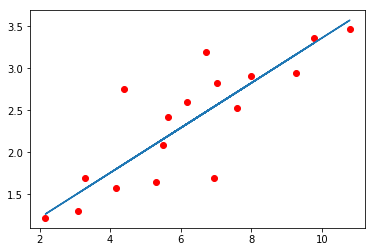

In [5]:
#x_numpy = x.data.numpy()
plot_variable(x, y, 'ro')
plot_variable(x, y_pred, label='Fitted line')

## Tensor introduction

### Scalar

大小:1x10

In [6]:
x = torch.rand(10)
x.size()

torch.Size([10])

### Vector

將torch的變數用浮點數表示

In [7]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

### Matrix

二維tensor張量的例子

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print (type(boston))
print(boston.data.shape)

<class 'sklearn.utils.Bunch'>
(506, 13)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston_tensor = torch.from_numpy(boston.data)
print (type(boston_tensor))

<class 'torch.Tensor'>


In [11]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

In [12]:
boston_tensor[:10,:5]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

### 3d- tensor

三維tensor張量的例子

In [13]:
from PIL import Image

panda = np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

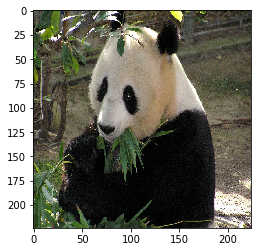

In [14]:
plt.imshow(panda);

### Slicing Tensor

In [15]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [16]:
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [17]:
sales[:-5] #與 sales[:-4] 相同

tensor([1000.0000,  323.2000,  333.4000])

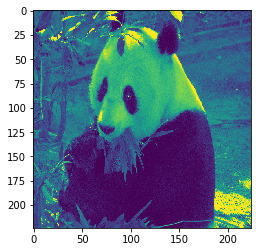

In [18]:
plt.imshow(panda_tensor[:,:,0].numpy());

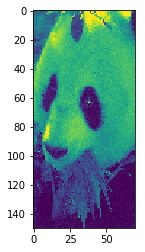

In [ ]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy());

### Select specific element of tensor

建立一個tensor形式的單位矩陣

In [ ]:
#torch.eye(shape) produces an diagonal matrix with 1 as it diagonal #elements.
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

### 4D Tensor

抓取一些貓的圖作為四維的陣列

In [ ]:
from glob import glob
#Read cat images from disk
data_path='D:/program/vscode_workspace/private/data/dogscats/sample/train/cats/'
cats = glob(data_path+'*.jpg')
#print(cats)
#Convert images into numpy arrays
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([8, 224, 224, 3])

### Tensor addition and multiplication

tensor的一些基本運算

In [ ]:
#Various ways you can perform tensor addition
a = torch.rand(2,2) 
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
#For in-place addition
s=a.add_(5)

#Multiplication of different tensors

a*b
s=a.mul(b)
#For in-place multiplication
a.mul_(b)

tensor([[1.0938, 1.8953],
        [1.8480, 0.2735]])

### CPU    VS    GPU
matrix 100X100


In [ ]:
from time import perf_counter

a = torch.rand(100,100)
b = torch.rand(100,100)

print("Matrix Size : 100x100")
t=perf_counter()
a.matmul(b)
print("CPU:",perf_counter()-t)

a = a.cuda()
b = b.cuda()
t=perf_counter()
a.matmul(b)
print("GPU:",perf_counter()-t)

Matrix Size : 100x100
CPU: 0.002534966999999888
GPU: 0.2441828320000008


### CPU    VS    GPU
matrix 10000X10000


In [ ]:
from time import perf_counter

a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

print("Matrix Size : 10000x10000")
t=perf_counter()
a.matmul(b)
print("CPU:",perf_counter()-t)

a = a.cuda()
b = b.cuda()

t=perf_counter()
a.matmul(b)
print("GPU:",perf_counter()-t)

Matrix Size : 10000x10000
CPU: 7.476431522
GPU: 0.012879633000000723


### Variables

一種包含tensor和gradient的資料類別

.data——獲得該節點的值，即Tensor類型的值

.grad——獲得該節點處的梯度信息

In [ ]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()
#y.backward()
#x.grad
print (y.grad_fn)

In [ ]:
print (x.grad_fn)

None


In [ ]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
print (y.grad_fn)

### Create data for our neural network

創建原始data並用Variable的形式表達


In [ ]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### Create learnable parameters

初始化原本的weight和bais

In [ ]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### Implement Neural Network

神經網路層與層之間聯繫的基本公式

In [ ]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

### Implement Neural Network in Pytorch

建立神經層的基本方式(例如:CNN中會用到的max pooling)

https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

### Implementing Loss Function

lossfunction的運算方式，類似tensorflow中的loss = tf.reduce_mean(tf.square(y-y_data))

In [ ]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

### Implementing Optimizer

定義優化器，並調整優化器的訓練效率

In [ ]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

## Loading Data

### Defining Dataset

利用類別的方式彙整圖形數據

_init_:為初始化所有的物件

_len_:物件的資料項目

_getitem_:傳回物件中的資料項目的第k資料

In [ ]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [ ]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-1]
        return img,label
    
image=DogsAndCatsDataset("D:/program/vscode_workspace/private/data/dogscats/sample/train/cats/*.jpg")
print(len(image))
print(image.size)
print(image[0][1])
print(image)

8
(224, 224)
cats\cat.11737.jpg


### Defining DataLoader to iterate over Dogs and Cats Dataset

In [ ]:

from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(image,batch_size=32,num_workers=2)
def main():
    for imgs , labels in dataloader:
        for i in range(len(imgs)):
            plt.subplot(241+i)
            plt.title(labels[i])
            plt.imshow(imgs[i])
        plt.show()
        pass

if __name__ == '__main__':
    main()


In [ ]:
print (1)